**Name:** \_\_\_\_\_

**EID:** \_\_\_\_\_

# Tutorial 4: Predicting Popularity of Online News

In this tutorial you will train regression models to predict the number of "shares" of a news article on Mashable.

First we need to initialize Python.  Run the below cell.

**Note**: The recommended version of scikit-learn for this tutorial is **1.3.0**. 

In [1]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
import glob
import os
import csv
import string
random.seed(100)

C:\Users\HAOYCH~1\AppData\Local\Temp/ipykernel_29712/1451563500.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.core.display.set_matplotlib_formats("svg")


## 1. Loading Data and Pre-processing
Next we need to load the data.  Download `OnlineNewsPopularity.zip`, and **unzip** it in the same directory as this ipynb file.  Then run the following cell to load the data.

In [3]:
filename = 'OnlineNewsPopularity/OnlineNewsPopularity.csv'

# read the data
allfeatnames = []
textdata      = []
with open(filename, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        if len(allfeatnames)==0:
            allfeatnames = row
        else:
            textdata.append(row)

# put the data into a np array
dataX = empty((len(textdata), len(allfeatnames)-3))
dataY = empty(len(textdata))
for i,row in enumerate(textdata):
    # extract features (remove the first 2 features and the last feature)
    dataX[i,:] = array([float(x) for x in row[2:-1]])
    # extract target (last entry)
    dataY[i] = float(row[-1])
    
# extract feature names
featnames = [x.strip() for x in allfeatnames[2:-1]]

# extract a subset of data
dataX = dataX[::6]
dataY = dataY[::6]

print(dataX.shape)
print(dataY.shape)

There are $58$ features for each article.  Here are the feature names, and an example entry.  The actual description of the features can be found in the `OnlineNewsPopularity-features.txt` file.

In [4]:
print(featnames)

print("--- example article features---")
print(dataX[0])
print("--- example article target (# of shares)")
print(dataY[0])

Now separate the data into training and test sets.

In [5]:
# randomly split data into 50% train and 50% test set
trainX, testX, trainYo, testYo = \
  model_selection.train_test_split(dataX, dataY, 
  train_size=0.50, test_size=0.50, random_state=100)

print(trainX.shape)
print(testX.shape)

Finally, we normalize the input features.

In [5]:
# normalize feature values
# this makes comparing weights more meaningful
scaler = preprocessing.StandardScaler()  
trainXn = scaler.fit_transform(trainX)  
testXn  = scaler.transform(testX)    

Because the target value (number of shares) has a large dynamic range, we will transform the target values through the log function.

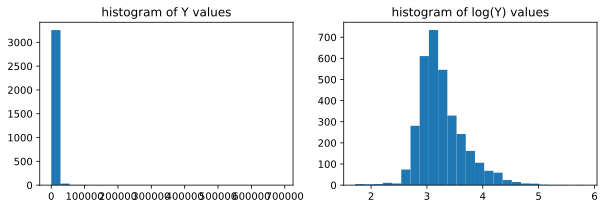

In [6]:
# map targets to log-space
trainY = log10(trainYo)
testY  = log10(testYo)

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.hist(trainYo, 25);
plt.title('histogram of Y values')
plt.subplot(1,2,2)
plt.hist(trainY, 25);
plt.title("histogram of log(Y) values");

## 2. Prediction with Linear Regression

First we will look at predicting the number of shares using simple linear regression models.  Use the training data to fit a linear model using Ordinary Least Squares and Ridge Regression.  Use cross-validation on the training set to select the optimal $\alpha$ parameter for ridge regression.

In [7]:
### INSERT YOUR CODE HERE
## HINT: 
# 1. Ordinary Least Squares: linear_model.LinearRegression()
# 2. Ridge Regression: linear_model.Ridge(alphas= )
# 3. Rigge Regression with Cross-validation: linear_model.RidgeCV(alphas= )

In [8]:
alphas = logspace(-5,15,30)

trainAEs = empty(len(alphas))
testAEs  = empty(len(alphas))
for i,a in enumerate(alphas):
    rr = linear_model.Ridge(alpha=a)
    rr.fit(trainXn, trainY)
    
    trainAEs[i] = metrics.mean_absolute_error(trainY, rr.predict(trainXn))
    testAEs[i]  = metrics.mean_absolute_error(testY, rr.predict(testXn))

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.semilogx(alphas, trainAEs)
plt.xlabel('alpha')
plt.title('train AE')
plt.grid(True)
plt.subplot(1,2,2)
plt.semilogx(alphas, testAEs)
plt.xlabel('alpha')
plt.title('test AE')
plt.grid(True)
    
rr = linear_model.RidgeCV(alphas=alphas, cv=5)
rr.fit(trainXn, trainY)

print("best alpha: ", rr.alpha_)

trainAE = metrics.mean_absolute_error(trainY, rr.predict(trainXn))
testAE  = metrics.mean_absolute_error(testY,  rr.predict(testXn))

print("train error: ", trainAE)
print("test error : ", testAE)

Compare the two models using the _average absolute error_ (AE) between the predictions and the true values.  Below is  code that will calculate AE for the training and test sets.

In [9]:
# ols is the linear regression model
trainAE = metrics.mean_absolute_error(trainY, ols.predict(trainXn))
testAE  = metrics.mean_absolute_error(testY, ols.predict(testXn))
print("OLS: train error =", trainAE)
print("OLS: test error =", testAE)

In [10]:
# rr is the ridge regression model
trainAE = metrics.mean_absolute_error(trainY, rr.predict(trainXn))
testAE  = metrics.mean_absolute_error(testY, rr.predict(testXn))
print("RR: train error =", trainAE)
print("RR: test error =", testAE)

Which model has better prediction ability on the test set? Why?
- **INSERT YOUR ANSWER HERE**

## 3. Which features are important?
Next we will investigate which features are the most important for the prediction.  Use LASSO with cross-validation to learn the model, and print the training and testing error.

In [12]:
### INSERT YOUR CODE HERE
## HINT
# 1. LASSO with Cross-validation: linear_model.LassoCV()

Examine the LASSO coefficients by sorting them in descending order.

In [11]:
# sort coefficients from smallest to largest, then reverse it
inds = argsort(abs(las.coef_))[::-1]
# print out
print("weight : feature description")
for i in inds:
    print("{: .3f} : {}".format(las.coef_[i], featnames[i]))

_Which features are most important for predicting the number of shares?  For these features, which feature values (low or high values) will yield a higher number of shares?_
- **INSERT YOUR ANSWER HERE**

## 3. Kernel Methods and Supprot Vector Regression 
Next, let us try some non-linear regression model such as[ kernel ridge regression](https://scikit-learn.org/stable/modules/kernel_ridge.html), [random forest regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)(Optional), [support vector regression](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html), and use cross-validation on the training set to select the parameters. 

In [12]:
### INSERT YOUR CODE HERE
##Hint: 
## 1. Kernel Ridge Regression:  kernel_ridge.KernelRidge(kernel='rbf'/'poly')
## 2. Random Forest Regression: ensemble.RandomForestRegressor(random_state= , n_estimators= )
## 3. Support Vector Regression: svm.SVR(kernel='poly')
## 4. Avoid using large values of C with SVR.

In [13]:
# LASSO - poly features
polyfeats = preprocessing.PolynomialFeatures(degree=2)
trainXnf  = polyfeats.fit_transform(trainXn)
testXnf   = polyfeats.transform(testXn) 

myname = 'las-poly'
clfs[myname] = linear_model.LassoCV(max_iter=2000)
clfs[myname].fit(trainXnf, trainY)
trainAE[myname] = metrics.mean_absolute_error(trainY, clfs[myname].predict(trainXnf))
testAE[myname]  = metrics.mean_absolute_error(testY, clfs[myname].predict(testXnf))

print("train error:", trainAE[myname])
print("test error :", testAE[myname])

In [14]:
# sort coefficients from smallest to largest, then reverse it
inds = argsort(abs(clfs['las-poly'].coef_))[::-1]
print(len(polyfeats.powers_))
# print out
print("weight : feature description")
for i in inds:
    if abs(clfs['las-poly'].coef_[i])>1e-3:
        # get active features and powers
        pows = where(polyfeats.powers_[i])[0]
        fstr = ""
        for p in pows:
            fstr += featnames[p] + "(" + str(polyfeats.powers_[i][p]) + ") "
        print("{: .3f} : {}".format(clfs['las-poly'].coef_[i], fstr))

_Which regression method performs the best? Why do you think so?_
- **INSERT YOUR ANSWER HERE**